In [3]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import numpy as np

In [4]:
%run ./load_datasets.ipynb
dfd = load_dealroom()
dfc_old = load_crunchbase(year_limit=2017)

C:\Users\alex\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (6,15,16,38,39,41,42,43,46,66,77) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [5]:
dfc1 = dfc_old[["Founded_Year", "average_if_period2"]]
dfc1.loc[:, 'dataset'] = "Crunchbase"
dfc1.rename(columns={"average_if_period2": "Prazo Médio", "Founded_Year": "Ano"}, inplace=True)

dfd1 = dfd[["launch_year", "average_funding_period2"]]
dfd1.loc[:, 'dataset'] = "Dealroom"
dfd1.rename(columns={"average_funding_period2": "Prazo Médio", "launch_year": "Ano"}, inplace=True)
dfconcat = pd.concat([dfc1, dfd1], axis=0)

C:\Users\alex\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\alex\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\alex\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda

[Text(0, 0.5, 'Prazo médio das rodadas de invest.'),
 Text(0.5, 0, 'Ano de abertura')]

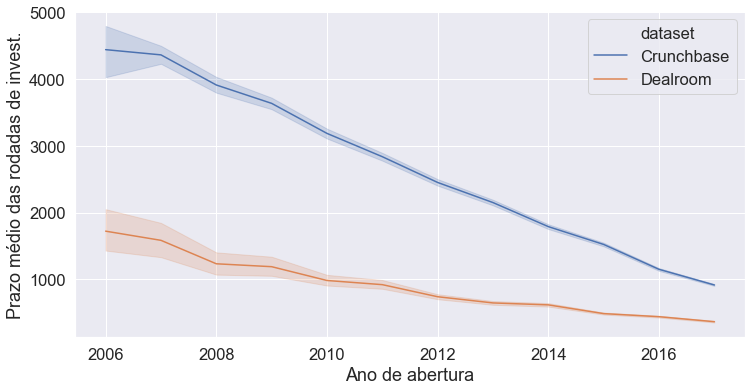

In [10]:
sns.set(font_scale=1.5)
fig, ax1 = plt.subplots(figsize=(12,6))
ax = sns.lineplot(x="Ano", ax=ax1, data=dfconcat, y="Prazo Médio", hue="dataset")
ax.set(xlabel="Ano de abertura", ylabel="Prazo médio das rodadas de invest.")

In [7]:
dfc_old.head(2)
dfc2 = pd.DataFrame()
dfc2["HQ COUNTRY"] = dfc_old["Headquarters Location"].apply(lambda x: str(x).split(',')[-1].strip())
dfc2.loc[:, 'dataset'] = "Crunchbase"
dfd2 = dfd[["HQ COUNTRY"]]
dfd2.loc[:, 'dataset'] = "Dealroom"
dfconcat2 = pd.concat([dfc2, dfd2], axis=0)
dfconcat2.rename(columns={"HQ COUNTRY": "País Sede"}, inplace=True)

C:\Users\alex\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\alex\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


[Text(0, 0.5, 'País Sede'), Text(0.5, 0, 'Número de Empresas')]

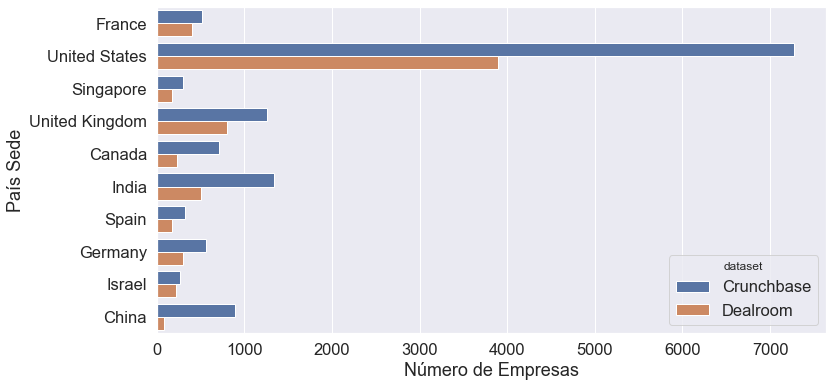

In [8]:
top10 = dfconcat2["País Sede"].value_counts().head(10).index
fig, ax1 = plt.subplots(figsize=(12,6))
ax = sns.countplot(data=dfconcat2[dfconcat2['País Sede'].isin(top10)], y="País Sede", hue="dataset", ax=ax1)
ax.set(xlabel="Número de Empresas", ylabel="País Sede")